In [1]:
using PyPlot, LinearAlgebra, Random, Distributions

In [2]:
room_width, room_height = 2.2, 2.2; # Width and height of environment (meters)
perimeter_dist = 0.03      # Perimeter region distance to walls (meters)
σv = 0.13 * 2π             # Forward velocity Rayleigh distribution scale (m/sec)
μω = 0.0                   # Rotation velocity Gaussian distribution mean (rad/sec)
σω = (330 / 360) * 2π * 2  # Rotation velocity Gaussian distribution standard deviation (rad/sec)
dt = 0.02                  # Simulation-step time increment (seconds)
decel_rate = 0.25;         # velocity reduction factor when located in the perimeter

In [3]:
println("% : ", -1 % 2, ", rem : ", rem(-1, 2), ", mod : ", mod(-1, 2))

% : -1, rem : -1, mod : 1


In [4]:
function minDistAngle(pos, head_dir)
    x, y = pos
    dists = [room_width/2-x, room_height/2-y, room_width/2+x, room_height/2+y]
    dist_wall, nearest_wall = findmin(dists)
    angle_wall = mod(head_dir - (nearest_wall-1)*π/2 + π, 2π) - π
    return dist_wall, angle_wall
end;

function generate_trajectory(num_steps)
    # store arrays
    position, velocity = zeros(num_steps, 2), zeros(num_steps, 2)
    speed, head_dir = zeros(num_steps), zeros(num_steps) # Forward speed, head direction

    # initial values
    head_dir[1], speed[1] = rand() * 2π, abs(randn()*σv*π/2)
    position[1, :] = (rand(2) .-0.5) .* ([room_width, room_height] .- perimeter_dist)
    
    # iteration of trajectory
    for t in 1:num_steps-1
        speed[t] = rand(Rayleigh(σv))
        turn_angle = rand(Normal(μω, σω)) * dt
        dist_wall, angle_wall = minDistAngle(position[t, :], head_dir[t])
        if (dist_wall < perimeter_dist) && (abs(angle_wall) < π/2) # avoid wall
            speed[t] *= decel_rate # deceleration
            turn_angle += sign(angle_wall) * (π/2 - abs(angle_wall))
        end
        velocity[t, :] = speed[t] * [cos(head_dir[t]), sin(head_dir[t])]
        position[t+1, :] = position[t, :] + velocity[t, :] * dt
        head_dir[t+1] = mod(head_dir[t] + turn_angle, 2π) # turn, 
    end
    return position, velocity, speed, head_dir
end;

In [5]:
num_timesteps = 5000
position, velocity, Speed, head_dir =  generate_trajectory(num_timesteps);

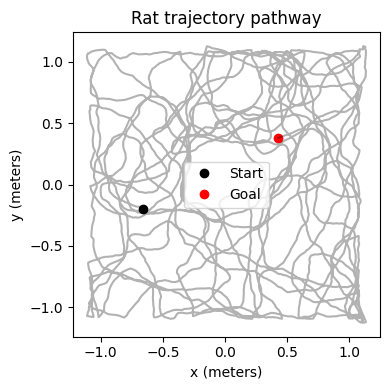

In [6]:
figure(figsize=(4, 4))
title("Rat trajectory pathway")
xlabel("x (meters)"); ylabel("y (meters)")
plot(position[1, 1], position[1, 2], "ko", label="Start")
plot(position[end, 1], position[end, 2], "ro", label="Goal")
plot(position[:, 1], position[:, 2], color="k", alpha=0.3)
legend()
tight_layout()